In [1]:
from __future__ import print_function

#Data Visualization

##Data Visualization and Exploration 

###1: Seaborn

Seaborn is a Python library supported by Stanford University that enables you to create beautiful, presentation-ready data visualizations. While Seaborn uses Matplotlib under the hood to represent, manipulate, and customize plots, it exposes a high-level API that abstracts away a lot of the internal Matplotlib logic. We get the best of both worlds with Seaborn: an easy-to-use API to quickly create attractive plots with the most common configuration options and a Matplotlib internal representation which allows us to tweak the plot to our heart's desire when we want more full control.

This excerpt from the <a href = "http://stanford.edu/~mwaskom/software/seaborn/introduction.html">Seaborn documentation</a> is a good summary of how to think about Matplotlib and Seaborn:

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, while the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), full customization of the figures will require a sophisticated understanding of matplotlib objects.

You can install seaborn using Anaconda and you can find more information on the <a href = "http://stanford.edu/~mwaskom/software/seaborn/installing.html">Seaborn website</a>.

####Introduction to the data

In this lesson, we'll be working with data from the National Survey of Family Growth. The data was collected from January 2002 to March 2003 and contains data on pregnancy, family life, and more. We've selected a few columns from the original data, which are:

- prglngth -- the length of the pregnancy in weeks.
- birthord -- which child this was for the pregnant mother.
- birthwgt_lb1 -- the pounds portion of the birth weight.
- birthwgt_oz1 -- the ounces portion of the birth weight.
- agepreg -- the mother's age at the end of the pregnancy, in years.

Let's import the CSV into Pandas and view the first 10 rows.

In [2]:
import numpy as np
import thinkstats2
import thinkplot

def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.
    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.birthwgt_lb1[df.birthwgt_lb1 > 20] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb1.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz1.replace(na_vals, np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb1 + df.birthwgt_oz1 / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.phase = np.nan

    
def ReadFemPreg(dct_file='data/2011_2013_FemPregSetup.dct',
                dat_file='data/2011_2013_FemPregData.dat.gz'):
    """Reads the NSFG pregnancy data.
    dct_file: string file name
    dat_file: string file name
    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file, encoding='iso-8859-1')
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df

births = ReadFemPreg()
births = births[['prglngth', 'birthord', 'birthwgt_lb1', 'birthwgt_oz1', 'agepreg']]
print("births.head(10):\n", births.head(10))

births.head(10):
    prglngth  birthord  birthwgt_lb1  birthwgt_oz1  agepreg
0        39         1             7             0    32.83
1        40         1             9             2    22.16
2        23       NaN           NaN           NaN      NaN
3        39         1             6            15    21.16
4        39         2             6             4    22.83
5        39         3             7             0    25.08
6        36         1             7             1    20.08
7        38         2             7            10    22.58
8         4       NaN           NaN           NaN    23.41
9        38         3             7            13    25.16


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###2: Histogram: distplot()

Seaborn exposes a simple API that enables us to create a range of visually appealing data <a href = "http://stanford.edu/~mwaskom/software/seaborn/examples/index.html">graphics</a> just by importing the library and specifying the graph we'd like generated. Every function in seaborn can be tweaked using the many high-level parameters easily.

In the previous lesson, we used the Pandas .hist() function, which uses Matplotlib under the hood, to generate a histogram of a column from a DataFrame. Unfortunately, the resulting plot wasn't very compelling since it used Matplotlib's default styling. Let's import Seaborn into our environment and use the function .distplot() to generate a histogram of values in the prglngth column, the length of each pregnancy in weeks.

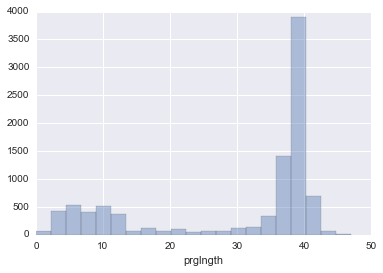

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(births['prglngth'], kde=False)
plt.show()

###3: Seaborn styling

We used the .distplot() function with the kde parameter set to False, since by default Seaborn will plot the kernel density <a href = "https://en.wikipedia.org/wiki/Kernel_density_estimation">estimate</a>, a way to esimate the probability density function of a random variable, of the column instead of generating a standard, binned histogram. We'll discuss kernel density estimates and how to use them in a later lesson, as it's outside the scope of this lesson.

As you can tell, the histogram Seaborn generated is much more visually appealing than the one created by Pandas & Matplotlib alone. Styling is the most basic thing that Seaborn provides. In fact, you can actually use seaborn exclusively for styling matplotlib graphics if you'd like! Just by importing Seaborn, the default styles are overriden for all plots.

####Instructions

Use the Pandas DataFrame .hist() function that you learned in the previous mission to plot the histogram of agepreg instead of Seaborn's .distplot() method.

You'll notice that the plot will be formatted using Seaborn's style instead of the default Matplotlib styles that Pandas uses since seaborn was imported to the environment and overrode the default styles.

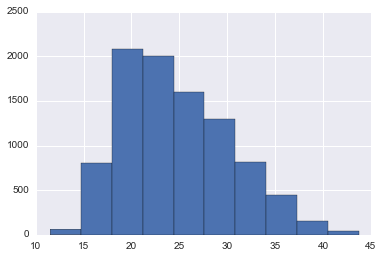

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

births['agepreg'].hist()
plt.show()

###4: Pandas vs. Seaborn

We just explored how to accomplish the same task, plotting a histogram of a column's values, using both Pandas and Seaborn. You may be wondering what the differences are between the approaches and when to use each technique. Both use Matplotlib to represent plots but have very different use cases by design.

Plotting using Pandas

The short answer is that you want to use Pandas to visualize data when you don't need to customize the resulting plot much and Seaborn when you want more extensive control using a simple API. The plotting functions available to Pandas DataFrame objects don't expose many parameters for customization of a plot and are primarily useful for data exploration (which is why the last mission used them heavily!). Customizing a plot generated from a Pandas DataFrame plotting method means working directly with the Matplotlib representation, which requires a much deeper understanding of Matplotlib (which we'll cover in a later lesson in this course).

Plotting using Seaborn

Seaborn, on the other hand, provides a good amount of customization for its plots both through its plotting functions' parameters and through top-level API functions on the Seaborn object. While both Pandas and Seaborn expose the underlying the Matplotlib representation for thorough customization, only Seaborn allows us to customize the data visualizations we generate using a simple API instead of having to dive into Matplotlib for common tweaks.

###5: Customizing histogram: distplot()

As we mentioned before, there are 2 primary ways to customize how a Seaborn plot looks like:

- Plotting function parameters, e.g. sns.distplot(kde=False)
- Seaborn functions, called on the sns Seaborn object synonym

Similar to how you use plt, matplotlib's import synonym, to customize matplotlib graphics, you use sns, seaborn's import synonym, to refer to a plot and call functions from <a href = "https://stanford.edu/~mwaskom/software/seaborn/api.html#style-frontend">Seaborn's API</a> to customize it. For example, to set the x-axis and y-axis labels, use the <a href = "https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.axlabel.html#seaborn.axlabel">.axlabel() function</a>:

    sns.distplot(births['prglngth'], kde=False)
    sns.axlabel('Pregnancy Length, weeks', 'Frequency')

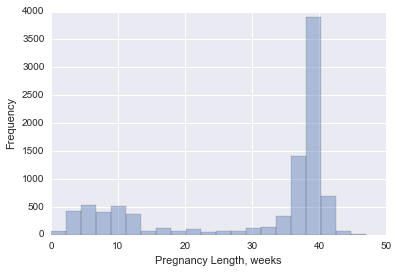

In [5]:
import seaborn as sns
%matplotlib inline

sns.distplot(births['prglngth'], kde=False)
sns.axlabel('Pregnancy Length, weeks', 'Frequency')

###6: Practice: customizing distplot()

Now it's your turn to practice customizing histograms using Seaborn!

####Instructions

Plot a histogram of the birthord column with the following tweaks:

        x-axis label: Birth number
        y-axis label: Frequency
        style: "dark"

In [6]:
import seaborn as sns

#sns.distplot(births['birthord'], kde=False)
#sns.set_style('dark')
#sns.axlabel('Birth number', 'Frequency')

###7: Boxplots: boxplot()

Given that we have data on how old the mother was at the end of the pregnancy and which child that birth was for the mother, it would be interesting to create a box plot to visualize the distribution of the mothers' ages as a function of which child it was for her.

This time, we're actually going to not walkthrough an example and instead challenge you to read the documentation and learn how to create the boxplot we're looking for. The documentation for the .boxplot() function can be found on Seaborn's <a href = "https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html">website</a>.

####Instructions

Generate a boxplot with the birthord column on the x-axis and the agepreg column on the y-axis, with the rest of the settings deafult otherwise.

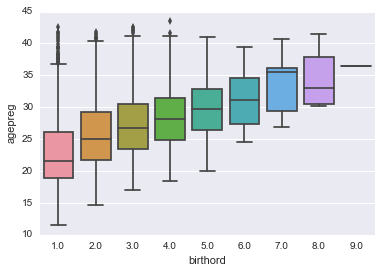

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x='birthord', y='agepreg', data=births)
plt.show()

###8: Pair plot: pairplot()

Instead of comparing relationships between variables by generating one chart for each combination of variables we're interested in exploring, we can use a Seaborn pair plot to automatically visualize all combinations of variables from columns in a DataFrame. A pair plot is an n by n grid of graphs, where n is the number of variables we're interested in comparing against each other. For 3 variables, 9 plots are generated:

    var1 vs var1
    var1 vs var2
    var1 vs var3
    var2 vs var1
    var2 vs var2
    var2 vs var3
    var3 vs var1
    var3 vs var2
    var3 vs var3

Whenever a variable is plotted against a different variable (e.g. var1 vs var2), Seaborn generates a scatter plot with var1 on the x-axis and var2 on the y-axis. Whenever a variable is plotted against itself (e.g. var1 vs var1), however, Seaborn generates a histogram of values instead, since a scatter plot where the axes are the same variable isn't particularly useful!

If you've tried to plot other columns besides agepreg, prglngth, or birthord, Seaborn, when interfacing with Matplotlib, will throw an error since these other columns have missing values (represented as NaN in the DataFrame). Visualizing columns from a DataFrame containing missing values is outside the scope of this mission and we'll stick to using the properly formatted columns for now.

To demonstrate how straightforward the syntax is for generating a pair plot, and most other plots as well, in Seaborn, we're going to ask you to generate a pair plot by reading the documentation on the <a href = "http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html">.pairplot() method</a>.

####Instructions

Generate a pair plot for the columns agepreg, prglngth, and birthord, in that order, with all other settings of the plot set to the default ones.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sns.pairplot(births[['agepreg','prglngth','birthord']])
#plt.show()